# MNIST

In [110]:
from keras.datasets import mnist
from tensorflow import keras
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

# Softmax

In [132]:
(X, y), (Xtest, y_test) = mnist.load_data()
y_train = to_categorical(y)
y_test = to_categorical(y_test)

In [133]:
net = models.Sequential()
net.add(layers.Dense(10, activation='softmax', input_shape=(28*28, )))
#input_dim = 1, units = 1
net.compile(optimizer = 'sgd', 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])


In [134]:
#preprocessing

X_train = X.reshape((60000, 28*28))
X_train = X_train/255

X_test = Xtest.reshape((10000, 28*28))
X_test = X_test/255


In [114]:
hist = net.fit(X_train, y_train, epochs=100)
y_acc = hist.history['accuracy']


Epoch 1/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7798 - accuracy: 0.8134
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4560 - accuracy: 0.8802
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4032 - accuracy: 0.8904
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3767 - accuracy: 0.8962
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3600 - accuracy: 0.9007
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3480 - accuracy: 0.9031
Epoch 7/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3392 - accuracy: 0.9050
Epoch 8/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3321 - accuracy: 0.9071
Epoch 9/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3261 - accuracy: 0.9088
Epoch 10/100
1875/1875 [==============================] - 2s 1ms/step - l

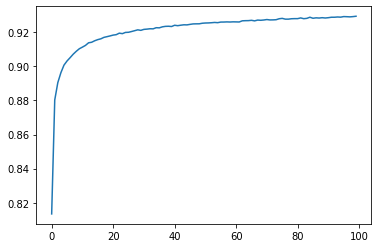

In [115]:
x = np.arange(0, 100, 1)
plt.plot(x, y_acc)
#흐음..

In [116]:
# for i in range(10):
#   plt.imshow(Xtest[i])
#   plt.title(i)
#   plt.show()

In [135]:
net.fit(X_train, y_train, epochs=20)



Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7900 - accuracy: 0.8105
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4591 - accuracy: 0.8791
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4052 - accuracy: 0.8906
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3781 - accuracy: 0.8962
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3611 - accuracy: 0.9003
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3490 - accuracy: 0.9031
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3399 - accuracy: 0.9052
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3326 - accuracy: 0.9071
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3266 - accuracy: 0.9093
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.321

In [136]:
np.argmax(net.predict(X_test)[0])
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [137]:
loss, soft_acc = net.evaluate(X_test, y_test)
print(soft_acc)

313/313 [==============================] - 0s 973us/step - loss: 0.2864 - accuracy: 0.9194
0.9193999767303467


# SVM

In [120]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

svc = LinearSVC()

(X, y), (Xtest, y_test) = mnist.load_data()

X_train = X.reshape((60000, 28*28))
X_train = X_train/255

X_test = Xtest.reshape((10000, 28*28))
X_test = X_test/255

svc.fit(X_train, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [121]:
y_pred = svc.predict(X_test)
print(svc.coef_[0, 1], svc.intercept_[0])


0.0 -1.2055522877191729


In [122]:
SVC_acc = accuracy_score(y_pred, y_test)
print(SVC_acc)

0.9183


# Random Forest

In [140]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


In [146]:
clf = RandomForestClassifier(n_estimators=50)
#nuber of tree

(X, y), (Xtest, y_test) = mnist.load_data()

X_train = X.reshape((60000, 28*28))
X_train = X_train/255

X_test = Xtest.reshape((10000, 28*28))
X_test = X_test/255

In [147]:
clf.fit(X_train, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [148]:
y_pred = clf.predict(X_test)
RF_acc = accuracy_score(y_pred, y_test)
print(RF_acc)

0.9686


In [149]:
acc ={
    'method': 'accuracy', 
    'softmax': f'{soft_acc}', 
    'SVC': f'{SVC_acc}', 
    'RandomForest': f'{RF_acc}'
}

In [150]:
import pandas as pd

df = pd.DataFrame(acc.values(), index= acc.keys())
df

,0
method,accuracy
softmax,0.9193999767303467
SVC,0.9183
RandomForest,0.9686


# 고찰



결과은 위의 표와 같이 나왔다. 
모두 0.9 이상이다. softmax는 epochs 값을 증가시키면 정확도가 증가하는 경향을 보였지만 overfitting 가능성도 있고 시간도 오래 걸려서 적당한 값을 선택하였다. 
SVC는 정확도는 softmax와 비슷하다. 다만 시간이 매우매우 오래 걸려서 이와 비슷한 분류를 할 때 다시는 사용하고싶지 않다. LinearSVC가 시간도 더 적게 들고 선형 분류에 최적화 되어있다고 해서 바꿔서 해봤다. 시간은 분명 줄었지만 짧은 시간은 아니었고 정확도가 줄었다. 선형이 아닌 다른 방법을 쓰면 다른 결과가 나올까 궁금하긴 하다. RandomForest는 n_estimators를 50과 100으로 설정해봤는데 둘 다 0.96 정도로 매우 우수한 결과를 보여줬고 시간도 적게 걸렸다. 
관련 계수를 어떻게 설정하느냐에 따라, 시간적 상황에 따라 조금의 차이는 있겠지만 MNIST 데이터 분류에는

$$ RandomForest>>> Softmax > SVC $$

이 순서로 정확하고 또 합리적인 방법인 것 같다. 
